# PSITIP Quick Start Guide
------

Author: Cheuk Ting Li  (https://staff.ie.cuhk.edu.hk/~ctli/)

<< Back to [table of contents](table_of_contents.ipynb)

Python Symbolic Information Theoretic Inequality Prover (PSITIP) is a computer algebra system for information theory written in Python. Random variables, expressions and regions are objects in Python that can be manipulated easily. Moreover, it implements a versatile deduction system for automated theorem proving. The working principle of PSITIP (existential information inequalities) is described in the following article:

C. T. Li, "An Automated Theorem Proving Framework for Information-Theoretic Results," in IEEE Transactions on Information Theory, vol. 69, no. 11, pp. 6857-6877, Nov. 2023. Link: https://ieeexplore.ieee.org/document/10185937 . Preprint: https://arxiv.org/pdf/2101.12370.pdf 


**Documentation, source code of PSITIP and these notebooks:** https://github.com/cheuktingli/psitip

**Install PSITIP locally on your computer:** https://github.com/cheuktingli/psitip#installation-guide

In [1]:
# If you are running this on Google Colab, uncomment and run the following:

# !apt-get install libgmp-dev python3-dev
# !pip install psitip

**Run the following boilerplate code every time:**

In [2]:
%matplotlib inline
# %matplotlib qt

from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    solve_display_reg = False,  # Do not display claims in solve commands
    proof_note_color = "blue",  # Reasons in proofs are blue
    figsize = (5,5)             # Default figure size for info diagrams
)

-----
## 1. Random Variables

A random variable named "X" is declared as <code>X = rv("X")</code>. You may declare multiple random variables in the same line as <code>X, Y = rv("X, Y")</code>. The data type is <code>Comp</code> (compound random variable). We now declare the random variables U, V, W, X, Y, Z.

In [3]:
U, V, W, X, Y, Z = rv("U, V, W, X, Y, Z")

The joint random variable (X,Y) is expressed as <code>X+Y</code> (NOT <code>(X,Y)</code>!):

In [4]:
X+Y

X+Y

Use <code>rv_seq("X", range(1, 4))</code> to declare a random sequence $X_1,...,X_3$:

In [5]:
Xs = rv_seq("X", range(1, 4))
Xs

X_1+X_2+X_3

In [6]:
Xs[1]  # Note that this gives X2 (the "1st" entry) instead of X1 since Python is 0-based

X_2

-----
## 2. Entropy and Mutual Information

- Entropy is denoted as <code>H(X)</code>.
- Joint entropy is denoted as <code>H(X+Y)</code> (or <code>H(X,Y)</code>, not recommended).
- Conditional entropy is denoted as <code>H(X | Y)</code>.
- Mutual information is denoted as <code>I(X & Y)</code> (NOT <code>I(X ; Y)</code>!).
- Multivariate mutual information $I(X;Y;Z)=I(X;Y)-I(X;Y|Z)$ is denoted as <code>I(X & Y & Z)</code>.

The data type is <code>Expr</code> (expression). For example, this is $I(X,Y;Z|U,V)$:

In [7]:
I(X+Y & Z | U+V)  # or I(X,Y & Z | U,V), not recommended

I(X+Y&Z|U+V)

Information diagram (Cover & Thomas, 2006) is a way to visualize entropy and mutual information via a Venn diagram. The entropy of each random variable is represented by a circle. Joint entropy $H(X,Y)$ is the union of the two circles for $X$ and $Y$. Mutual information $I(X;Y)$ is the intersection of the two circles. Conditional entropy $H(X|Y)$ is the region in the circle for $X$ outside of the region in the circle for $Y$.

The information diagram can be drawn using <code>a.venn()</code> (where <code>a</code> is <code>Comp</code> or <code>Expr</code>). By default, only the random variables in <code>a</code> will be drawn. If additional random variables or expressions should be included, supply them as arguments to <code>Expr.venn(???)</code>.

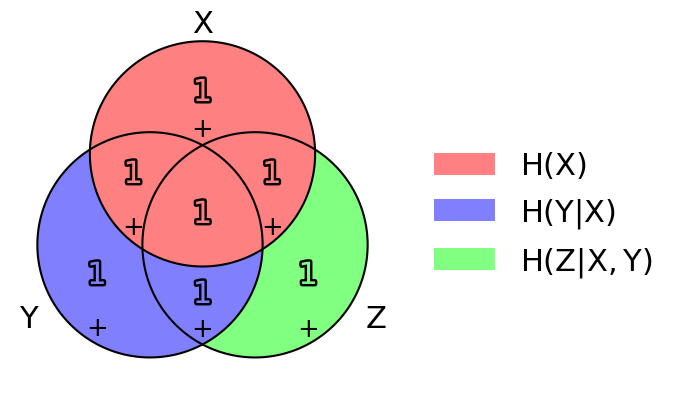

In [8]:
(X+Y+Z).venn(H(X), H(Y|X), H(Z|X+Y))

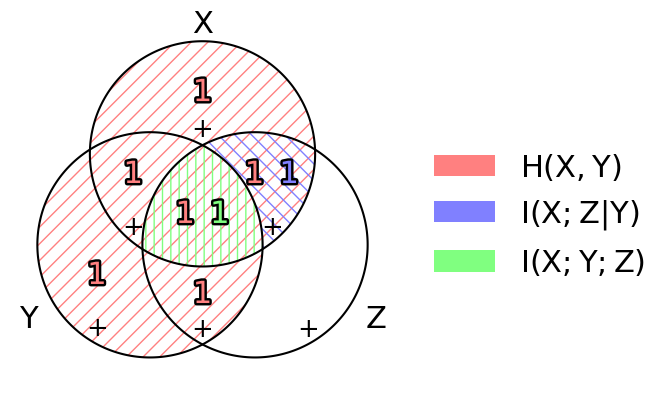

In [9]:
(X+Y+Z).venn(H(X+Y), I(X & Z | Y), I(X & Y & Z), style="hatch")

The function <code>a.venn()</code> supports information diagrams with up to 5 random variables:

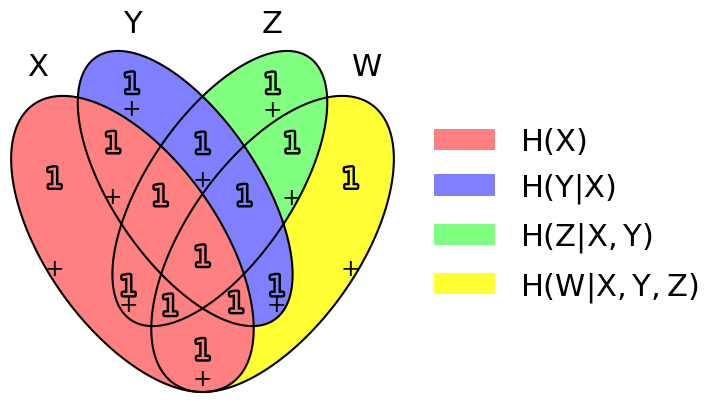

In [10]:
(X+Y+Z+W).venn(H(X), H(Y|X), H(Z|X+Y), H(W|X+Y+Z))

Nevertheless, Venn diagrams with 4 or more regions can be quite hard to read. When there are 4 or more random variables, it is recommended to use Karnaugh map instead via <code>a.table()</code>, which is a table where each random variable is represented by a set of rows or columns.

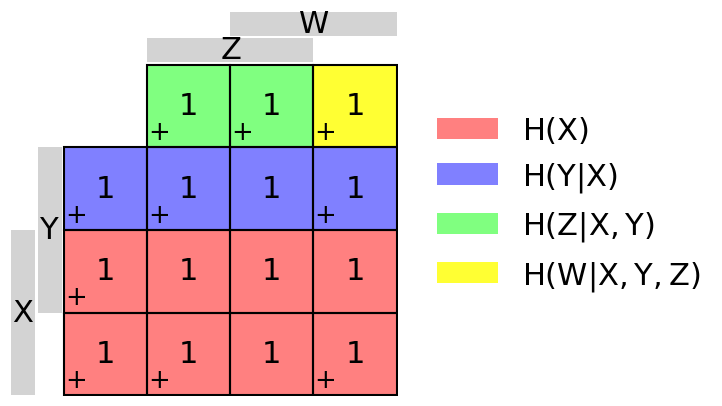

In [11]:
(X+Y+Z+W).table(H(X), H(Y|X), H(Z|X+Y), H(W|X+Y+Z))

-----
## 3. Real Variables and Expressions

A real variable (e.g., rate, capacity) is declared as <code>R = real("R")</code>. You may declare multiple random variables in the same line as <code>R, S = real("R, S")</code>. The data type is <code>Expr</code> (expression). 

You may add expressions and multiply expressions by scalars. For example:

In [12]:
R = real("R")

R + (3/2) * I(X & Y)

R+(3/2)*I(X&Y)

Use <code>real_array("R", range(1, 4))</code> to declare a real sequence $R_1,...,R_3$:

In [13]:
real_array("R", range(1, 4))

ExprArray([R_1, R_2, R_3])

-----
## 4. Regions

A region (datatype <code>Region</code>) is a set of constraints on several random variables or real variables, or equivalently, a set of possible random/real variables where all constraints hold. When two expressions are compared, the return value is a region that represents this inequality. For example, the constraint that $H(X) \le H(Y)$ is denoted as:

In [14]:
H(X) <= H(Y)

H(X) <= H(Y) 

To check whether an inequality always hold, cast the <code>Region</code> into <code>bool</code>.

In [15]:
bool(H(X) + H(Y) >= H(X+Y))

True

The empty region is given by <code>region(False)</code>. The universal region (where no constraint is imposed) is given by <code>region()</code> or <code>region(True)</code>.

In [16]:
display(region(False))
display(region(True))

empty()

universe()

### 4.1 Functional Relation

The random variable Y is a function of X if and only if $H(Y|X)=0$, which can be input as <code>H(Y|X) == 0</code>. A shorter notation is <code>\~H(Y|X)</code>. For an expression <code>a</code>, we can use the shorthand <code>\~a</code> for <code>a == 0</code>.

In [17]:
display(H(Y|X) == 0)
display(~H(Y|X))
# Note: to display multiple outputs in the same cell in Jupyter Notebook, 
#   one must call "display" for each output. 
#   Otherwise, only the last output will be displayed.

H(Y|X) == 0 

H(Y|X) == 0 

### 4.2 Probabilistic Independence

Two random variables X, Y are independent ($X \perp\!\!\perp Y$) if and only if $I(X;Y)=0$, which can be input as <code>I(X & Y) == 0</code>. PSITIP also provides a convenient function <code>indep(X, Y)</code> for the same purpose. For the condition that X, Y, Z are mutually independent, use <code>indep(X, Y, Z)</code> (NOT <code>I(X & Y & Z) == 0</code>).

In [18]:
display(I(X & Y) == 0)
display(indep(X, Y))
display(indep(X, Y, Z))

indep(X, Y) 

indep(X, Y) 

indep(X, Y, Z) 

### 4.3 Conditional Independence

Two random variables X, Z are conditionally independent given Y if and only if $I(X;Z|Y)=0$, which can be input as <code>I(X & Z | Y) == 0</code>. PSITIP also provides a convenient function <code>indep(X, Z | Y)</code> for the same purpose.

Note that X, Z are conditionally independent given Y is equivalent to saying that $X \leftrightarrow Y \leftrightarrow Z$ forms a Markov chain. This can be input as <code>markov(X, Y, Z)</code>. This function is convenient for longer Markov chain, e.g., <code>markov(V, W, X, Y, Z)</code>.

In [19]:
display(I(X & Z | Y) == 0)
display(indep(X, Z | Y))
display(markov(X, Y, Z))

markov(X, Y, Z) 

markov(X, Y, Z) 

markov(X, Y, Z) 

<code>Region.venn()</code> or <code>Region.table()</code> displays the information diagram corresponding to the region. In the following diagram, the cell $I(X;Z|Y)$ is black, meaning that the cell is zero.

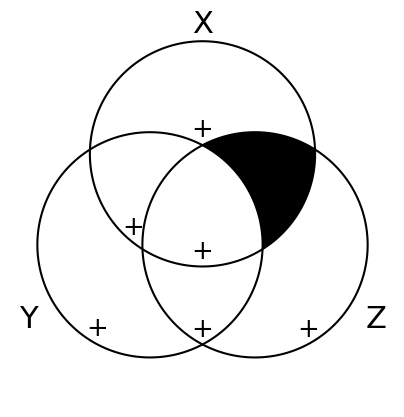

In [20]:
markov(X, Y, Z).venn()

### 4.4 Factorization of Probability Distribution

More complicated dependencies among random variables can be represented as a factorization of their joint probability mass function. For example, if the joint probability mass function of X, Y, Z, W can be factorized as $p(x,y,z,w)=p(x)p(y|x)p(z|x)p(w|y,z)$, this means that we have $I(Z;Y|X)=I(W;X|Y,Z)=0$. Such a factorization can be input as:

In [21]:
r = region(X, Y|X, Z|X, W|Y+Z)
r

( ( markov(Z, X, Y) )
 &( markov(X, Z+Y, W) ) )

This factorization can be visualized as a directed graph, called a *Bayesian network*. We can display the Bayesian network that is implied by the conditions in a region by:

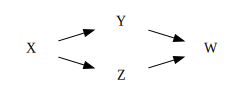

In [22]:
r.graph()
# If the graph fails to display, make sure graphviz is installed

### 4.5 Combining Regions

The intersection of two regions r1, r2 (where both the constraints in r1 and r2 must hold) is denoted as <code>r1 & r2</code>. One may also use <code>region(r1, r2)</code>. For example, the constraint $X \leftrightarrow Y \leftrightarrow Z$ and $H(X) <= H(Z)$ can be denoted as:

In [23]:
markov(X, Y, Z) & (H(X) <= H(Z))  # Parentheses are needed since "&" binds closer than "<="
region(markov(X, Y, Z), H(X) <= H(Z))  # This is equivalent
region(X, Y|X, Z|Y, H(X) <= H(Z))  # This is equivalent

( ( H(X) <= H(Z) )
 &( markov(Z, Y, X) ) )

Other logical operations can also be performed. For example, the union of two regions (logical OR) is <code>r1 | r2</code>. The complement (logical NOT)  is <code>~r1</code>.

In [24]:
(H(X) <= H(Y)) | (H(Y) <= H(X))

(
  (  H(X) <= H(Y)  )
 |
  (  H(Y) <= H(X)  )
)

### 4.6 Simplifying Regions

Calling <code>Region.simplified()</code> returns a simplified region where redundant inequalities are removed. This might take some time for complicated regions. <code>Region.simplified_quick()</code> is faster, but less thorough.

In [25]:
((H(X) <= H(Y)) | (H(Y) <= H(X))).simplified()  # Is always true

universe()

In [26]:
(markov(X, Y, Z, W) & markov(X, Z, W)).simplified()  # markov(X, Z, W) is redundant

markov(X, Y, Z, W) 

In [27]:
(markov(X, Y, Z) & (R >= H(Y)) & (R >= I(X & Z))).simplified()  # R >= I(X & Z) redundant

( ( R >= H(Y) )
 &( markov(X, Y, Z) ) )

Remark: <code>???.simplified()</code> works on expressions as well.

### 4.7 Substitution

If we want to replace occurences of X by Y in a region or expression, use <code>???.subs(X, Y)</code> or <code>???.subs(X = Y)</code> (not recommended).

In [28]:
markov(X, Y, Z).subs(X, U+V)

markov(U+V, Y, Z) 

To carry out multiple substitutions, for example, replacing X1 by Y1 and replacing X2 by Y2, use <code>???.subs(X1, Y1, X2, Y2)</code>. In particular, to swap X and Y, use <code>???.subs(X, Y, Y, X)</code>.

In [29]:
markov(X, Y, Z).subs(X, Y, Y, X)

markov(Y, X, Z) 

-----
## 5. Implication and Proof

To check whether the constrains in r1 imply the constraints in r2 (i.e., whether the region r1 is a subset of the region r2), use <code>bool(r1 >> r2)</code>. For example, if X is a function of (Y,Z), then $H(X) \le H(Y) + H(Z)$:

In [30]:
bool(~H(X | Y+Z) >> (H(X) <= H(Y) + H(Z)))

True

Note that <code>r1 >> r2</code> returns a <code>Region</code>, and is logically equivalent to <code>~r1 | r2</code> (i.e., (NOT r1) OR r2). Any operation that can be performed on <code>Region</code> (e.g., intersection, union, negation, implication) can be performed on <code>r1 >> r2</code> as well.

To show the proof of an implication, use <code>(r1 >> r2).solve(full=True)</code> or <code>(r1 >> r2).proof()</code>:

In [31]:
(~H(X | Y+Z) >> (H(X) <= H(Y) + H(Z))).solve(full=True)

True


H(X)
= I(X&Y+Z)   (since H(X|Y+Z) == 0 )
<= H(Y+Z)
<= H(Y)+H(Z)

If an implication is false, <code>(r1 >> r2).solve(full=True)</code> may provide a counter-example:

In [32]:
(~H(X | Y+Z) >> (H(X) * 2 <= H(Y) + H(Z))).solve(full=True)

False

P(X+Y+Z) = tensor([[[0.0000, 0.0000],
         [0.5000, 0.0000]],

        [[0.5000, 0.0000],
         [0.0000, 0.0000]]], dtype=torch.float64, grad_fn=<CopySlices>)


Logical equivalence (i.e., r1 if and only if r2) is denoted as <code>r1 == r2</code>. For example, if $H(X | Y, Z)=0$, then $H(X)=H(Y)+H(Z)$ if and only if $Y \perp\!\!\perp Z$ AND $H(Y,Z|X)=0$:

In [33]:
(~H(X | Y+Z) >> ((H(X) == H(Y) + H(Z)) == (indep(Y, Z) & ~H(Y+Z | X)))).solve(full=True)

True


1. Steps: 
I(Y&Z)
= H(X)-H(Y+Z)   (since H(X) == H(Y)+H(Z) )
<= H(X|Y+Z)
= 0   (since H(X|Y+Z) == 0 )

2. Steps: 
H(Y+Z|X)
= H(Y+Z)-H(X)   (since H(X|Y+Z) == 0 )
= -I(Y&Z)   (since H(X) == H(Y)+H(Z) )
<= 0

-----
# Advanced Topics

-----
## 6. Existential and Universal Quantification

### 6.1 Existentially-Quantified Real Variables and Projection

For regions involving several real variables, sometimes we want to project it down to a lower dimensional space and remove some variables. For example, if a region $r(a,b)$ is a constraint on two real variables $a, b$, then calling <code>r.exists(a)</code> will give the region $\exists a: r(a,b)$, i.e., we project it onto the $b$-axis so the resultant region will not involve $a$. For example:

In [34]:
a, b, c = real("a, b, c")
region(a >= 0, b >= 0, a + 2*b <= 4).exists(a)

( ( b >= 0 )
 &( b <= 2 ) )

Alternatively, calling <code>r.projected(b)</code> will project it onto the $b$-axis, removing all real variables except $b$.

In [35]:
region(a >= 0, b >= 0, a + 2*b <= 4).projected(b)

( ( b >= 0 )
 &( b <= 2 ) )

One may also project a region along other directions. For example, calling <code>r.projected(c == a + b)</code> project the region along the $a+b$ direction, mathematically equivalent to $\exists a \exists b: (r(a,b) \wedge (c=a+b))$.

In [36]:
region(a >= 0, b >= 0, a + 2*b <= 4).projected(c == a + b)

( ( c >= 0 )
 &( c <= 4 ) )

Projecting to $a$ and $c=a+b$ performs a change of basis from $a,b$ to $a, c$.

In [37]:
region(a >= 0, b >= 0, a + 2*b <= 4).projected([a, c == a + b])

( ( a >= 0 )
 &( a <= c )
 &( 2*c-a <= 4 ) )

Projection is often performed in network information theory to remove rate variables. Internally, projection is performed via Fourier-Motzkin elimination. For example, consider the Slepian-Wolf rate region (Slepian & Wolf, 1973):

In [38]:
R1, R2 = real_array("R", [1, 2])
S = real("S")

r = region(
    R1 >= H(X | Y),
    R2 >= H(Y | X),
    R1+R2 >= H(X + Y)
)
r

( ( R_1 >= H(X|Y) )
 &( R_2 >= H(Y|X) )
 &( R_1+R_2 >= H(X+Y) ) )

If there is no constraint on $R_2$ (we can choose any $R_2$), then the lowest $R_1$ is $H(X|Y)$ since we can just take $R_2 \to \infty$.

In [39]:
r.exists(R2)

R_1 >= H(X|Y) 

On the other hand, if $R_2$ is set to 0, then the lowest $R_1$ is $H(X)$, and we also need $H(Y|X)=0$ for decoding to be possible.

In [40]:
(r & (R2 == 0)).simplified()

( ( R_1 >= H(X) )
 &( R_2 == 0 )
 &( H(Y|X) == 0 ) )

We can also substitute $R_2$ by 0 to deduce the same constraints.

In [41]:
r.subs(R2, 0).simplified()

( ( R_1 >= H(X) )
 &( H(Y|X) == 0 ) )

If we only care about the sum rate $S = R_1+R_2$, then we only need $S \ge H(X,Y)$.

In [42]:
r.projected(S == R1 + R2)

S >= H(X+Y) 

### 6.2 Existentially-Quantified (Auxiliary) Random Variables

In network information theory, rate regions are often expressed as "there exists a random variable U such that ...". The U is called an *auxiliary random variable*. The function <code>r.exists(U)</code> returns the region $\exists U: r$. For example, the capacity region of the degraded broadcast channel $p(y|x)p(z|y)$ (Bergmans, 1973; Gallager, 1974):
$$\exists U: \, 0 \le R_1 \le I(X;Y|U), 0 \le R_2 \le I(U;Z), U\leftrightarrow X\leftrightarrow Y\leftrightarrow Z $$
can be expressed as:

In [43]:
R1, R2 = real_array("R", [1, 2])
S = real("S")

dbc = region(
    R1 >= 0,
    R2 >= 0,
    R1 <= I(X & Y | U),
    R2 <= I(U & Z),
    markov(U, X, Y, Z)
).exists(U)
dbc

( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_1 <= I(X&Y|U) )
 &( R_2 <= I(U&Z) )
 &( markov(U, X, Y, Z) ) ).exists(U)

Note that the above region is a statement about $X, Y, Z, R_1, R_2$, not about $U$. The $U$ is a "local variable" that only exists inside of the region. As an analogy, the statement "$\exists k \in \mathbb{Z}: n = 2k$" (which checks whether $n$ is even) is a statement about $n$, not about $k$. Calling <code>r.exists(U)</code> logically "eliminates" U (the resultant region is no longer logically a statement about U), but does not internally eliminate U (it merely marks U as an auxiliary random variable).

The return value of <code>r.exists(U)</code> is a <code>Region</code> that supports all aforementioned operations on regions. For example, we can perform projection. Calling <code>simplified</code> can sometimes completely eliminate an auxiliary random variable U if the program can find an equivalent region that does not involve the auxiliary. For example:

In [44]:
# Fix R1 == 0, the auxiliary U can be eliminated
(dbc & (R1 == 0)).simplified()

( ( R_2 >= 0 )
 &( R_2 <= I(X&Z) )
 &( R_1 == 0 )
 &( markov(X, Y, Z) ) )

In [45]:
# Project to S == R1+R2 to obtain constraints on sum rate
dbc.projected(S == R1+R2).simplified()

( ( S >= 0 )
 &( S <= I(X&Y) )
 &( markov(X, Y, Z) ) )

We can use <code>r1 >> r2</code> to check that whether the region r1 is a subset of the region r2. This is useful for comparing rate regions. For example, consider the following equivalent form of the capacity region:

In [46]:
dbc2 = region(
    R1 >= 0,
    R2 >= 0,
    R2 <= I(U & Z),
    R1 + R2 <= I(U & Z) + I(X & Y | U),
    markov(U, X, Y, Z)
).exists(U)
dbc2

( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_2 <= I(U&Z) )
 &( R_1+R_2 <= I(U&Z)+I(X&Y|U) )
 &( markov(U, X, Y, Z) ) ).exists(U)

In [47]:
(dbc2 >> dbc).solve(full=True)  # r2 is a subset of r

True


1. Claim:
( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_1 <= I(X&Y|U) )
 &( R_2 <= I(U&Z) )
 &( markov(U, X, Y, Z) ) ).exists(U)

  1.1. Substitute CompArray(
[[U, U_1]]):

  1.2. Steps: 
  R_1
  <= I(U_1&Z)+I(X&Y|U_1)-R_2   (since R_1+R_2 <= I(U_1&Z)+I(X&Y|U_1) )
  = I(X&Y|U_1)   (since R_2 == I(U_1&Z) )

In [48]:
(dbc >> dbc2).solve(full=True)  # r is a subset of r2

True


1. Claim:
( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_2 <= I(U&Z) )
 &( R_1+R_2 <= I(U&Z)+I(X&Y|U) )
 &( markov(U, X, Y, Z) ) ).exists(U)

  1.1. Substitute CompArray(
[[U, U_1]]):

  1.2. Steps: 
  R_1+R_2
  = I(U_1&Z)+R_1   (since R_2 == I(U_1&Z) )
  <= I(U_1&Z)+I(X&Y|U_1)   (since R_1 <= I(X&Y|U_1) )

### 6.3 Universally-Quantified Random Variables

PSITIP supports any first-order logic statement about random variables. Random variables can not only be existentially quantified (there exists), but also be universally quantified (for all). The function <code>r.forall(U)</code> returns the region $\forall U: r$. This is sometimes useful in network information theory. For example, the condition that $p(y|x)$ is less noisy than $p(z|x)$ (Körner-Marton 1975)
$$\forall U:\, (U \leftrightarrow X \leftrightarrow (Y,Z)) \to I(U;X) \ge I(U;Y),$$
i.e., for every U such that $U \leftrightarrow X \leftrightarrow (Y,Z)$, we have $I(U;X) \ge I(U;Y)$, can be expressed as:

In [49]:
lessnoisy = (markov(U, X, Y+Z) >> (I(U & Y) >= I(U & Z))).forall(U)
lessnoisy

((  markov(Y+Z, X, U)  )
>> (  I(U&Z) <= I(U&Y)  )).forall(U)

In [50]:
(lessnoisy >> (I(X & Y) >= I(X & Z))).solve()

True
CompArray(
[[U, X],
 [U, rv()]])

### 6.4 Discover Inequalities: Top-Down and Bottom-Up Projections

PSITIP provides two methods to perform projection, i.e., discover the inequalities among a subset of the random variables and real variables entailed by a region, and eliminate all other variables:

- **Top-down projection:** The aforementioned <code>exists</code> and <code>projected</code> functions perform Fourier-Motzkin elimination on real variables.
  - Pros: Fast when eliminating a small number of real variables. Is mathematically exact.
  - Cons: Does not eliminate random variables (it merely marks them as auxiliary symbolically). Slow when the number of real variables to be eliminated is large.

- **Bottom-up projection:** The <code>Region.discover([X, Y, a, b])</code> function automatically discovers inequalities among the random variables X, Y and expressions a, b, subject to the constraints in the region. If no constraints are needed, use <code>region().discover([X, Y, a, b])</code> (<code>region()</code> is the "universal set" where no constraints are imposed). Internally, it uses the convex hull method for polyhedron projection (Lassez-Lassez 1991).
  - Pros: Works for both random and real variables. Fast when eliminating most of the variables (leaving only at most 4 random variables).
  - Cons: Slow when the number of random variables to be kept is greater than 4. Is only a conservative estimate of the projection (the returned region may be larger than the actual projection).

In sum, use <code>exists</code> or <code>projected</code> if the number of real variables to be eliminated is small; use <code>discover</code> if the number of variables to be kept is small.

Using the Slepian-Wolf rate region (Slepian & Wolf, 1973) as an example:

In [51]:
R1, R2 = real_array("R", [1, 2])
S = real("S")

r = region(
    R1 >= H(X | Y),
    R2 >= H(Y | X),
    R1+R2 >= H(X + Y)
)
# r.discover([X, Y, R1])  # Same result as r.projected(R1) or r.exists(R2)
(r & (S == R1 + R2)).discover([X, Y, S])  # Same result as r.projected(S == R1 + R2)

S >= H(X+Y) 

A useful application of <code>discover</code> is to discover non-Shannon inequalities. For example, we now use the copy lemma to derive the Zhang-Yeung inequality (Zhang-Yeung 1998). The copy lemma states that for any random variables X, Y, Z, W, there exists a random variable U such that (X, Y, U) has the same joint distribution as (X, Y, Z), and $U \leftrightarrow (X,Y) \leftrightarrow (Z,W)$. We use <code>discover</code> to discover all inequalities among X, Y, Z, W (eliminating U) implied by the copy lemma.

In [52]:
# State the copy lemma
# eqdist([X, Y, U], [X, Y, Z]) means that [X, Y, U] has the same joint
# distribution as [X, Y, Z], but only equalities of joint entropies are enforced
r = eqdist([X, Y, U], [X, Y, Z]) & markov(U, X+Y, Z+W)

# Automatically discover non-Shannon-type inequalities using copy lemma
r.discover([X, Y, Z, W]).simplified()

( ( I(W&X&Z) <= 2*I(X&Z|Y)+I(W&Y)+I(X&Y|Z)+I(Y&Z|X) )
 &( I(W&Y&Z) <= 2*I(Y&Z|X)+I(W&X)+I(X&Y|Z)+I(X&Z|Y) )
 &( I(X&Y&Z) <= I(W&Z)+I(X&Y|W)+I(X&Y|Z)+I(X&Z|Y)+I(Y&Z|X) ) )

Another useful application of <code>discover</code> is to discover outer bounds of the capacity region in network information theory, to be discussed later.

-----
## 7. User-Defined Information Quantities

It is possible to define new quantities via constrained minimization/maximization. The function <code>r.maximum(a, X)</code> returns the quantity (<code>Expr</code> object) given by maximizing <code>a</code> (<code>Expr</code> object) subject to the constraint <code>r</code> (<code>Region</code> object) over the random variable <code>X</code> (<code>Comp</code> object). For example, the information bottleneck (Tishby-Pereira-Bialek 1999) $\max_{U:\, U \leftrightarrow X \leftrightarrow Y,\, I(X;U)\le t} I(Y;U)$ is expressed as:

In [53]:
X, Y, U = rv("X, Y, U")
t = real("t")
s1, s2 = real_array("s", [1, 2])

(markov(U, X, Y) & (I(X & U) <= t)).maximum(I(Y & U), U)

(( ( t >= I(X&U) )
 &( markov(U, X, Y) ) ).exists(U)).maximum(I(Y&U))

For the sake of convenience, we define a function <code>info_bot(X, Y, t)</code>. We now use PSITIP to prove some properties of the information bottleneck:

In [54]:
def info_bot(X, Y, t):
    U = rv("U")
    return (markov(U, X, Y) & (I(X & U) <= t)).maximum(I(Y & U), U)

# Info bottleneck is non-decreasing
((s1 <= s2) >> (info_bot(X, Y, s1) <= info_bot(X, Y, s2))).solve() 

True
CompArray(
[[U, U_1]])

In [55]:
# If X, Y indep., then info_bot(X, Y, t) == 0
(indep(X, Y) >> (info_bot(X, Y, t) == 0)).solve()

True
CompArray(
[[U, U_1]])

In [56]:
# When t = H(X), info_bot(X, Y, t) always equals I(X;Y)
info_bot(X, Y, H(X)).simplified()

I(X&Y)

PSITIP has various built-in information quantities (that are internally defined in the same manner as <code>info_bot</code> above). For example:

- <code>gacs_korner(X & Y)</code>: Gács-Körner common information (Gács-Körner 1973) $K(X;Y) = \sup_{p_{U|X,Y}: H(U|X)=H(U|Y)=0} H(U)$.
- <code>wyner_ci(X & Y)</code>: Wyner's common information (Wyner 1975) $J(X;Y) = \inf_{p_{U|X,Y}: I(X;Y|U)=0} I(U;X,Y)$.
- <code>exact_ci(X & Y)</code> Common entropy (Kumar-Li-El Gamal 2014) $G(X;Y) = \inf_{p_{U|X,Y}: I(X;Y|U)=0} H(U)$.

See [Common Information](learnit_3_commoninfo.ipynb) for more details.

In [57]:
display(gacs_korner(X & Y) == gacs_korner(X & Y).defn()) # Print definition
display(wyner_ci(X & Y) == wyner_ci(X & Y).defn())
display(exact_ci(X & Y) == exact_ci(X & Y).defn())

gacs_korner(X&Y) == (( ( markov(U, Y, X) )
 &( markov(U, X, Y) ) ).exists(U)).maximum(I(U&X+Y)) 

wyner_ci(X&Y) == (( ( markov(X, U, Y) ) ).exists(U)).minimum(I(U&X+Y)) 

exact_ci(X&Y) == (( ( markov(X, U, Y) ) ).exists(U)).minimum(H(U)) 

In [58]:
# Gács-Körner <= Wyner
(gacs_korner(X & Y) <= wyner_ci(X & Y)).solve()

True

Recall that the function <code>Region.discover([X, Y, a, b])</code> automatically discovers inequalities among the random variables X, Y and expressions a, b, subject to the constraints in the region. If no constraints are needed, use <code>region().discover([X, Y, a, b])</code> (<code>region()</code> is the "universal set" where no constraints are imposed).

In [59]:
region().discover([X, Y, gacs_korner(X & Y), wyner_ci(X & Y), exact_ci(X & Y)])

( ( exact_ci(X&Y) <= H(X) )
 &( exact_ci(X&Y) <= H(Y) )
 &( I(X&Y) <= wyner_ci(X&Y) )
 &( gacs_korner(X&Y) >= 0 )
 &( gacs_korner(X&Y) <= I(X&Y) )
 &( wyner_ci(X&Y) <= exact_ci(X&Y) ) )

In [60]:
# Subject to H(Y|X)==0, all these quantities equal H(Y)
(H(Y|X) == 0).discover([X, Y, gacs_korner(X & Y), wyner_ci(X & Y), exact_ci(X & Y)])

( ( exact_ci(X&Y) == H(Y) )
 &( exact_ci(X&Y) == wyner_ci(X&Y) )
 &( gacs_korner(X&Y) == exact_ci(X&Y) )
 &( H(Y|X) == 0 ) )

The function <code>Region.order([a, b, c]).graph()</code> computes the partial order among expressions a, b, c, subject to the constraints in the region, and draws the Hasse diagram.

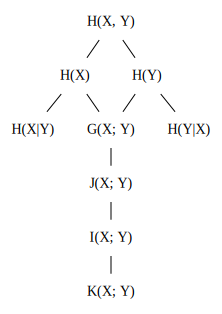

In [61]:
region().order([I(X&Y), H(X), H(Y), H(X+Y), H(X|Y), H(Y|X),
    gacs_korner(X & Y), wyner_ci(X & Y), exact_ci(X & Y)]).graph(ranksep=0.25)

#### References

- T. M. Cover and J. A. Thomas, Elements of information theory, John Wiley & Sons, 2006.
- R. W. Yeung, Information theory and network coding, Springer Science & Business Media, 2008.
-  D. Slepian and J. K. Wolf, "Noiseless coding of correlated information sources," IEEE Trans. Inf. Theory, vol. IT-19, no. 4, pp. 471–480, Jul. 1973.
- P. Bergmans, "Random coding theorem for broadcast channels with degraded components,” IEEE Trans. Inf. Theory, vol. IT-19, no. 2, pp. 197–207, Mar. 1973.
- R. G. Gallager, "Capacity and coding for degraded broadcast channels," Problems Inf. Transmiss., vol. 10, no. 3, pp. 3–14, May 1974.
- J. Körner and K. Marton, Comparison of two noisy channels, Topics in Inform. Theory (ed. by I. Csiszar and P. Elias), Keszthely, Hungary (August, 1975), 411-423.
- C. Lassez and J.-L. Lassez, Quantifier elimination for conjunctions of linear constraints via a convex hull algorithm, IBM Research Report, T.J. Watson Research Center, RC 16779 (1991)
- Z. Zhang and R. W. Yeung, "On characterization of entropy function via information inequalities," IEEE Trans. Inform. Theory, vol. 44, pp. 1440-1452, Jul 1998.
- Tishby, Naftali, Pereira, Fernando C., Bialek, William (1999). The Information Bottleneck Method. The 37th annual Allerton Conference on Communication, Control, and Computing. pp. 368-377.
- A. D. Wyner. The common information of two dependent random variables. IEEE Trans. Info. Theory, 21(2):163-179, 1975.
- P. Gács and J Körner, "Common information is far less than mutual information," Problems of Control and Information Theory 2.2: 149-162, 1973.
- G. R. Kumar, C. T. Li, and A. El Gamal, "Exact common information," in Proc. IEEE Symp. Info. Theory. IEEE, 2014, pp. 161-165.